# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: Junhui Cho


**Prompt:**

> Describe the IMDB dataset.

Response:

The IMDB dataset is a collection of movie reviews from the website imdb.com. It consists of 50,000 movie reviews, with 25,000 reviews for training and 25,000 reviews for testing. Each review is labeled as either positive or negative, with positive reviews having a label of 1 and negative reviews having a label of 0. The dataset is preprocessed such that each review is represented as a sequence of integers, where each integer represents a word in the review. The words are indexed by their frequency of occurrence in the dataset, with the most frequent word having index 1, the second most frequent word having index 2, and so on. The maximum number of words to keep in the dataset can be set using the `num_words` parameter when loading the dataset.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [1]:
from keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-10-12 16:11:06.949691: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 16:11:06.996284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 16:11:07.228694: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 16:11:07.228748: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 16:11:07.229811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

Note that the dataset is already processed, so the records are lists of integers.

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


In [3]:
import matplotlib.pyplot as plt

# Create a reverse word index
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first review in the training data
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

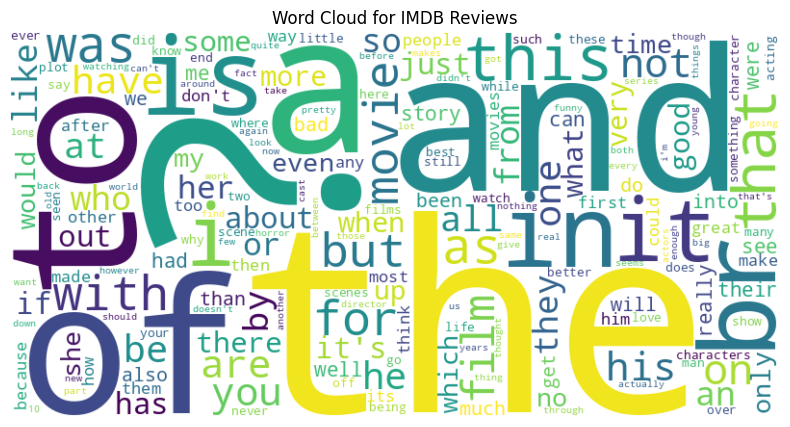

In [5]:
from wordcloud import WordCloud

# Create a frequency dictionary of the words in the training data
word_freq = {}
for review in train_data:
    for index in review:
        word = reverse_word_index.get(index - 3, "?")  # indexes 0, 1, and 2 are reserved
        word_freq[word] = word_freq.get(word, 0) + 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for IMDB Reviews')
plt.show()

It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

In [6]:
import nltk
from nltk.corpus import stopwords
import string

# Download the stopwords from NLTK
nltk.download('stopwords')

# Define the list of stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def decode_review(review):
    # Decoding review back to text
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

def remove_stopwords_punctuation(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and not any(char in punctuation for char in word)]
    return ' '.join(filtered_words)

cleaned_train_data = [remove_stopwords_punctuation(decode_review(review)) for review in train_data]
cleaned_test_data = [remove_stopwords_punctuation(decode_review(review)) for review in test_data]

print(cleaned_train_data[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/jh00/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


film brilliant casting location scenery story direction really suited part played could imagine robert amazing actor director father came scottish island loved fact real connection film witty remarks throughout film great brilliant much bought film soon released would recommend everyone watch fly fishing amazing really cried end sad know say cry film must good definitely also two little played norman paul brilliant children often left list think stars play grown big profile whole film children amazing praised done think whole story lovely true life shared us


> now created a word cloud from the filtered words

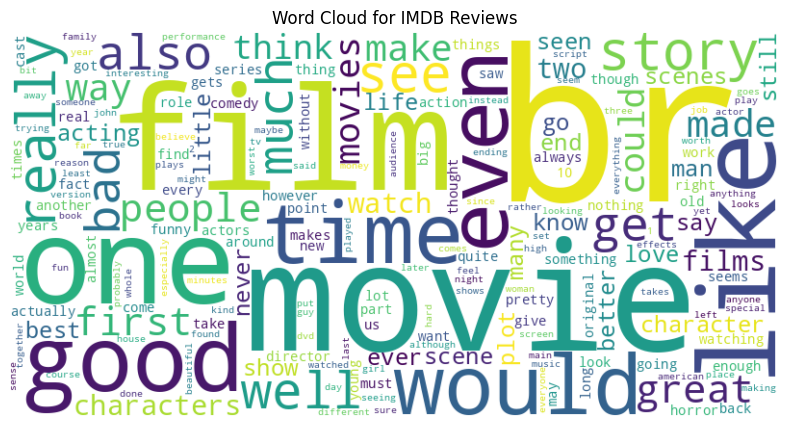

In [8]:
word_freq = {}
for review in cleaned_train_data:
    for word in review.split():
        word_freq[word] = word_freq.get(word, 0) + 1   


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for IMDB Reviews')
plt.show()


Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

In [18]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

# 1. Padding sequences
maxlen = 300
train_data_padded = np.array(pad_sequences(train_data, maxlen=maxlen, padding='post'))
test_data_padded = np.array(pad_sequences(test_data, maxlen=maxlen, padding='post'))

# 2. Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data_padded, train_labels, epochs=10, batch_size=512, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(test_data_padded, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
40/40 [==============================] - 1s 15ms/step - loss: 0.6895 - accuracy: 0.5252 - val_loss: 0.6684 - val_accuracy: 0.5788
Epoch 2/10
40/40 [==============================] - 0s 12ms/step - loss: 0.4979 - accuracy: 0.7742 - val_loss: 0.3763 - val_accuracy: 0.8346
Epoch 3/10
40/40 [==============================] - 0s 11ms/step - loss: 0.2338 - accuracy: 0.9118 - val_loss: 0.3310 - val_accuracy: 0.8618
Epoch 4/10
40/40 [==============================] - 0s 11ms/step - loss: 0.1339 - accuracy: 0.9591 - val_loss: 0.3023 - val_accuracy: 0.8786
Epoch 5/10
40/40 [==============================] - 0s 11ms/step - loss: 0.0790 - accuracy: 0.9826 - val_loss: 0.3187 - val_accuracy: 0.8760
Epoch 6/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0431 - accuracy: 0.9944 - val_loss: 0.3314 - val_accuracy: 0.8768
Epoch 7/10
40/40 [==============================] - 0s 11ms/step - loss: 0.0263 - accuracy: 0.9980 - val_loss: 0.3604 - val_accuracy: 0.8722
Epoch 8/10
40

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain



The code above is an excerpt from a Jupyter notebook that demonstrates how to create a classifier for the IMDB dataset using the Keras library. The first step in the code is to import the necessary libraries, including `numpy`, `tensorflow.keras.datasets`, `tensorflow.keras.preprocessing.sequence`, `tensorflow.keras.models`, and `tensorflow.keras.layers`.

The next step is to pad the sequences of integers representing the movie reviews using the `pad_sequences()` function from Keras. The `maxlen` parameter sets the maximum length of the padded sequences. The padded sequences are then stored in the `train_data_padded` and `test_data_padded` variables as NumPy arrays.

The code then defines a sequential model using the `Sequential()` class from Keras. The model consists of an embedding layer, a flatten layer, a dense layer with 16 units and a ReLU activation function, and a dense layer with 1 unit and a sigmoid activation function for binary classification. The embedding layer maps each integer in the input sequence to a dense vector of fixed size, which is learned during training.

The model is then compiled using the `compile()` method, with the `adam` optimizer and binary crossentropy loss function. The `fit()` method is used to train the model on the training data, with a batch size of 512 and 5 epochs. The `validation_split` parameter sets the fraction of the training data to use for validation during training.

Finally, the `evaluate()` method is used to evaluate the model on the test data. The `loss` and `accuracy` of the model on the test data are then printed to the console. The `accuracy` represents the percentage of correctly classified movie reviews in the test data.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.